In [11]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from google.cloud import vision
import time

# Function to extract image URL from a webpage using Selenium
def extract_image_url_selenium(page_url):
    try:
        chrome_options = Options()
        chrome_options.add_argument("--headless")  # Run in headless mode to avoid popups
        chrome_options.add_argument("--disable-gpu")
        chrome_options.add_argument("--no-sandbox")

        service = Service()  # Replace with ChromeDriver path if needed
        driver = webdriver.Chrome(service=service, options=chrome_options)

        driver.get(page_url)
        time.sleep(2)  # Wait for the page to load

        img_tag = driver.find_element(By.CSS_SELECTOR, 'img.exhibition__image.image--has-caption')
        image_url = img_tag.get_attribute("src")
        driver.quit()
        return image_url
    except Exception as e:
        driver.quit()
        return None

# Function to generate alt text using Google Vision API
def generate_alt_text(image_url):
    try:
        client = vision.ImageAnnotatorClient()
        image = vision.Image()
        image.source.image_uri = image_url

        response = client.label_detection(image=image)
        labels = response.label_annotations

        # Generate alt text using the labels
        alt_text = ', '.join(label.description for label in labels[:5])  # Limit to 5 labels
        return alt_text
    except Exception as e:
        return None

# Function to log errors to a file
def log_error(page_url):
    with open('error.log', 'a') as file:
        file.write(f"{page_url}\n")

# Load the CSV file
df = pd.read_csv('test_data.csv')

# Initialize lists for image URLs and alt text
image_urls = []
alt_texts = []

# Process each page URL
for page_url in df['Image link']:
    image_url = extract_image_url_selenium(page_url)
    if image_url:
        image_urls.append(image_url)
        alt_text = generate_alt_text(image_url)
        alt_texts.append(alt_text if alt_text else "Alt text not generated")
    else:
        image_urls.append(None)
        alt_texts.append("No image found")
        log_error(page_url)  # Log the page URL with no image found

# Add the extracted image URLs and alt text to the DataFrame
df['Extracted Image URL'] = image_urls
df['Generated Alt Text'] = alt_texts

# Save the updated DataFrame to a new CSV
df.to_csv('updated_with_alt_text2.csv', index=False)


In [ ]:
#To detect and construct text from images with text using Google Vision API

In [4]:
# Authentication to Google API
import os
import math
from collections import Counter
from google.cloud import vision
import re

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='/Users/hvs/DataScience/emerald-surface-447815-d2-ee8553b95874.json'
WORD = re.compile(r"\w+")

In [13]:
###OLD
import requests

def detect_text(image_url):
    """Detects text in the image URL."""
    
    client = vision.ImageAnnotatorClient()
    
    # Fetch image data from URL
    image_data = requests.get(image_url).content

    image = vision.Image(content=image_data)

    # Use document_text_detection for dense text
    response = client.document_text_detection(image=image)
    texts = response.text_annotations
    ocr_text = []

    for text in texts:
        ocr_text.append(f"\r\n{text.description}")

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )
    return ocr_text


In [15]:
###OLD
image_url = "https://images.liverpoolmuseums.org.uk/styles/dynamic_medium/public/import-objects/70256_v0_large.jpg"  # Replace with actual image URL
text = detect_text(image_url)
print(text)

['\r\nJackes\nUNTIL THE LIONS HAVE THE HISTORIANS, TALES OF\nHUNTING WILL ALWAYS GLORIFY THE HUNTER-\nAFRICAN PROVERS\n"Up from a past that is rooted in pain.\nI rise."\n1997\nMAYA ANGELOU\n\'EUROPEAN YEAR\nAGAINST RACISM\'', '\r\nJackes', '\r\nUNTIL', '\r\nTHE', '\r\nLIONS', '\r\nHAVE', '\r\nTHE', '\r\nHISTORIANS', '\r\n,', '\r\nTALES', '\r\nOF', '\r\nHUNTING', '\r\nWILL', '\r\nALWAYS', '\r\nGLORIFY', '\r\nTHE', '\r\nHUNTER-', '\r\nAFRICAN', '\r\nPROVERS', '\r\n"', '\r\nUp', '\r\nfrom', '\r\na', '\r\npast', '\r\nthat', '\r\nis', '\r\nrooted', '\r\nin', '\r\npain', '\r\n.', '\r\nI', '\r\nrise', '\r\n.', '\r\n"', '\r\n1997', '\r\nMAYA', '\r\nANGELOU', "\r\n'", '\r\nEUROPEAN', '\r\nYEAR', '\r\nAGAINST', '\r\nRACISM', "\r\n'"]


In [16]:
###OLD
text[0]

'\r\nJackes\nUNTIL THE LIONS HAVE THE HISTORIANS, TALES OF\nHUNTING WILL ALWAYS GLORIFY THE HUNTER-\nAFRICAN PROVERS\n"Up from a past that is rooted in pain.\nI rise."\n1997\nMAYA ANGELOU\n\'EUROPEAN YEAR\nAGAINST RACISM\''

In [17]:
###OLD
for line in text:
    print(line)


Jackes
UNTIL THE LIONS HAVE THE HISTORIANS, TALES OF
HUNTING WILL ALWAYS GLORIFY THE HUNTER-
AFRICAN PROVERS
"Up from a past that is rooted in pain.
I rise."
1997
MAYA ANGELOU
'EUROPEAN YEAR
AGAINST RACISM'

Jackes

UNTIL

THE

LIONS

HAVE

THE

HISTORIANS

,

TALES

OF

HUNTING

WILL

ALWAYS

GLORIFY

THE

HUNTER-

AFRICAN

PROVERS

"

Up

from

a

past

that

is

rooted

in

pain

.

I

rise

.

"

1997

MAYA

ANGELOU

'

EUROPEAN

YEAR

AGAINST

RACISM

'


In [25]:
###OLD
#To show the image

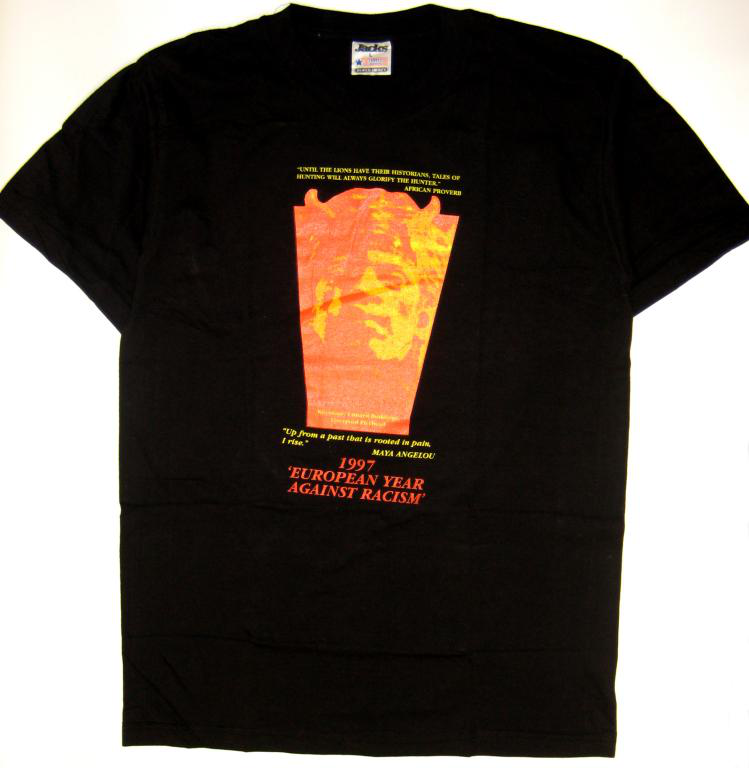

In [24]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

# Replace this with your image URL
image_url = "https://images.liverpoolmuseums.org.uk/styles/dynamic_medium/public/import-objects/70256_v0_large.jpg"

# Fetch the image from the URL
response = requests.get(image_url)

# Check if the request was successful
if response.status_code == 200:
    # Open the image using Pillow
    image = Image.open(BytesIO(response.content))
    # Display the image in the notebook
    display(image)
else:
    print("Failed to fetch the image. Status code:", response.status_code)


In [28]:
###On whole data set


import pandas as pd
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from google.cloud import vision
import time

# Function to extract image URL from a webpage using Selenium
def extract_image_url_selenium(page_url):
    try:
        chrome_options = Options()
        chrome_options.add_argument("--headless")  # Run in headless mode
        chrome_options.add_argument("--disable-gpu")
        chrome_options.add_argument("--no-sandbox")

        service = Service()  # Replace with ChromeDriver path if needed
        driver = webdriver.Chrome(service=service, options=chrome_options)

        driver.get(page_url)
        time.sleep(2)  # Wait for the page to load

        img_tag = driver.find_element(By.CSS_SELECTOR, 'img.exhibition__image.image--has-caption')
        image_url = img_tag.get_attribute("src")
        driver.quit()
        return image_url
    except Exception as e:
        driver.quit()
        return None

# Function to generate alt text using Google Vision API
def generate_alt_text(image_url):
    try:
        client = vision.ImageAnnotatorClient()
        image = vision.Image()
        image.source.image_uri = image_url

        response = client.label_detection(image=image)
        labels = response.label_annotations

        # Generate alt text using the labels
        alt_text = ', '.join(label.description for label in labels[:5])  # Limit to 5 labels
        return alt_text
    except Exception as e:
        return None

# Function to detect text in the image using Google Vision API
def detect_text(image_url):
    try:
        client = vision.ImageAnnotatorClient()

        # Fetch image data from URL
        image_data = requests.get(image_url).content
        image = vision.Image(content=image_data)

        # Use document_text_detection for dense text
        response = client.document_text_detection(image=image)
        texts = response.text_annotations

        # Combine detected text into a single string, removing line breaks
        detected_text = " ".join(text.description.replace("\n", " ") for text in texts)
        if response.error.message:
            raise Exception(
                "{}\nFor more info on error messages, check: "
                "https://cloud.google.com/apis/design/errors".format(response.error.message)
            )

        return detected_text
    except Exception as e:
        return f"Error detecting text: {str(e)}"

# Function to log errors to a file
def log_error(page_url):
    with open('error.log', 'a') as file:
        file.write(f"{page_url}\n")

# Load the CSV file
df = pd.read_csv('test_data.csv')

# Initialize lists for image URLs, alt text, and detected text
image_urls = []
alt_texts = []
detected_texts = []

# Process each page URL
for page_url in df['Image link']:
    image_url = extract_image_url_selenium(page_url)
    if image_url:
        image_urls.append(image_url)

        # Generate alt text
        alt_text = generate_alt_text(image_url)
        alt_texts.append(alt_text if alt_text else "Alt text not generated")

        # Detect text in the image
        detected_text = detect_text(image_url)
        detected_texts.append(detected_text)
    else:
        image_urls.append(None)
        alt_texts.append("No image found")
        detected_texts.append("No text detected")
        log_error(page_url)  # Log the page URL with no image found

# Add the extracted data to the DataFrame
df['Extracted Image URL'] = image_urls
df['Generated Alt Text'] = alt_texts
df['Detected Text'] = detected_texts

# Save the updated DataFrame to a new CSV
df.to_csv('updated_with_alt_text_and_detected_text.csv', index=False)


In [30]:
###On subset of data (with a lot of text)

import pandas as pd
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from google.cloud import vision
import time

# Function to extract image URL from a webpage using Selenium
def extract_image_url_selenium(page_url):
    try:
        chrome_options = Options()
        chrome_options.add_argument("--headless")  # Run in headless mode
        chrome_options.add_argument("--disable-gpu")
        chrome_options.add_argument("--no-sandbox")

        service = Service()  # Replace with ChromeDriver path if needed
        driver = webdriver.Chrome(service=service, options=chrome_options)

        driver.get(page_url)
        time.sleep(2)  # Wait for the page to load

        img_tag = driver.find_element(By.CSS_SELECTOR, 'img.exhibition__image.image--has-caption')
        image_url = img_tag.get_attribute("src")
        driver.quit()
        return image_url
    except Exception as e:
        driver.quit()
        return None

# Function to generate alt text using Google Vision API
def generate_alt_text(image_url):
    try:
        client = vision.ImageAnnotatorClient()
        image = vision.Image()
        image.source.image_uri = image_url

        response = client.label_detection(image=image)
        labels = response.label_annotations

        # Generate alt text using the labels
        alt_text = ', '.join(label.description for label in labels[:5])  # Limit to 5 labels
        return alt_text
    except Exception as e:
        return None
        
def detect_text(image_url):
    try:
        client = vision.ImageAnnotatorClient()

        # Fetch image data from URL
        image_data = requests.get(image_url).content
        image = vision.Image(content=image_data)

        # Use document_text_detection for dense text
        response = client.document_text_detection(image=image)
        texts = response.text_annotations

        # Only extract the full detected text (the first element in the list)
        if texts:
            detected_text = texts[0].description.replace("\n", " ")  # Get the full detected text from the first annotation
        else:
            detected_text = ""

        if response.error.message:
            raise Exception(
                "{}\nFor more info on error messages, check: "
                "https://cloud.google.com/apis/design/errors".format(response.error.message)
            )

        return detected_text
    except Exception as e:
        return f"Error detecting text: {str(e)}"

# Function to log errors to a file
def log_error(page_url):
    with open('error.log', 'a') as file:
        file.write(f"{page_url}\n")

# Load the CSV file
df = pd.read_csv('test_data.csv')
df = df.tail(60)

# Initialize lists for image URLs, alt text, and detected text
image_urls = []
alt_texts = []
detected_texts = []

# Process each page URL
for page_url in df['Image link']:
    image_url = extract_image_url_selenium(page_url)
    if image_url:
        image_urls.append(image_url)

        # Generate alt text
        alt_text = generate_alt_text(image_url)
        alt_texts.append(alt_text if alt_text else "Alt text not generated")

        # Detect text in the image
        detected_text = detect_text(image_url)
        detected_texts.append(detected_text)
    else:
        image_urls.append(None)
        alt_texts.append("No image found")
        detected_texts.append("No text detected")
        log_error(page_url)  # Log the page URL with no image found

# Add the extracted data to the DataFrame
df['Extracted Image URL'] = image_urls
df['Generated Alt Text'] = alt_texts
df['Detected Text'] = detected_texts

# Save the updated DataFrame to a new CSV
df.to_csv('updated_with_alt_text_and_detected_text_tail60.csv', index=False)


In [40]:
###Use descriptive fields to support ChatGPT to generate alt text

In [47]:
import openai
import pandas as pd
import os

# Make sure to set your OpenAI API key
openai.api_key = os.getenv("OPENAI_API_KEY")

# Function to generate alt text using ChatGPT (Updated for new API interface)
def generate_alt_text_with_context(image_url, descriptions):
    # Concatenate all descriptions into one prompt to guide the alt text generation
    prompt = f"Generate an alt text for the image with the URL: {image_url}. Use the following descriptions to inform your alt text generation: {descriptions}. Make sure the alt text is concise, descriptive, and captures key elements of the image."
    
    try:
        # Updated API call using ChatCompletion for new API interface
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",  # Specify the model you're using
            messages=[
                {"role": "system", "content": "You are an AI trained to generate descriptive and concise alt text for images."},
                {"role": "user", "content": prompt}
            ],
            max_tokens=100,  # Adjust token length as needed
            temperature=0.7  # Controls creativity (adjust as needed)
        )
        
        # Extract the generated alt text from the response
        alt_text = response['choices'][0]['message']['content'].strip()
        return alt_text
    except Exception as e:
        return f"Error generating alt text: {str(e)}"


In [48]:
# Load the CSV file
df = pd.read_csv('updated_with_alt_text_and_detected_text_tail60.csv')  # Ensure your CSV file is in the right format

# Initialize a list for the alt text
alt_texts = []

# Process each row and generate alt text
for index, row in df.iterrows():
    image_url = row['Extracted Image URL']
    
    # Concatenate the four description fields (replace 'Title', 'Category/discipline', etc. with actual column names)
    descriptions = f"Description 1: {row['Title']}, Description 2: {row['Category/discipline']}, Description 3: {row['Generated Alt Text']}, Description 4: {row['Detected Text']}"
    
    # Generate alt text using the image URL and concatenated descriptions
    alt_text = generate_alt_text_with_context(image_url, descriptions)
    alt_texts.append(alt_text)

# Add the generated alt text to the DataFrame
df['ChatGPT Alt Text'] = alt_texts

# Save the updated DataFrame to a new CSV
df.to_csv('updated_with_alt_text_GPT.csv', index=False)
